In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\shash\Desktop\Minor - Spotify Songs’ Genre Segmentation\spotify dataset.csv")
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [3]:
df.dropna(inplace=True) # ALL NULL ROWS ARE REMOVED
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [4]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
features = ["track_popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]

In [6]:
#Dropping Columns that are not required.

data = df[features].copy()
data

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,66,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,67,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,70,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,60,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,69,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,20,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,14,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,15,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


Scaling the Data 1-100

In [7]:
data = ((data - data.min())/(data.max()-data.min())) *99 + 1
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,43.058715,66.951361,70.156436,49.365542,83.415578,57.007920,12.544982,18.464588,9.441878,19.902977,52.004069,50.981125
std,24.730671,14.612496,17.913802,32.504148,6.199849,49.071074,10.925255,21.876050,22.334244,15.338359,23.291625,11.123703
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.760000,57.700916,58.511740,19.000000,80.404024,1.000000,5.421569,2.503924,1.000000,10.214157,34.066599,42.330350
50%,45.550000,68.678535,72.374165,55.000000,84.563858,100.000000,7.740196,9.007646,1.001604,13.623494,52.148335,51.436084
75%,62.380000,77.641913,84.157228,82.000000,87.719129,100.000000,15.235294,26.397384,1.481056,25.650602,70.230071,56.370476
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
data.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,66.34,76.332655,91.682544,55.0,91.890891,100.0,7.287255,11.158954,1.000000,7.490663,52.747730,51.457584
1,67.33,74.116989,81.681794,100.0,87.047000,100.0,5.022549,8.210865,1.419306,36.484940,70.230071,42.334898
2,70.30,68.980671,93.167804,10.0,90.235463,1.0,9.001961,8.908048,1.002321,11.933735,62.238143,52.272937
3,60.40,73.311292,93.068787,64.0,89.517696,100.0,12.000000,3.858451,1.000939,21.277108,28.672048,51.424507
4,69.31,66.462869,83.464106,10.0,87.663118,100.0,4.871569,8.997686,1.000000,9.279819,73.426842,52.259706


Initializing Random Centroids

In [9]:
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [10]:
centroids = random_centroids(data,10)

In [11]:
centroids

,0,1,2,3,4,5,6,7,8,9
track_popularity,16.840000,1.000000,2.980000,67.330000,56.440000,27.730000,9.910000,41.590000,54.460000,55.450000
danceability,61.729400,74.821974,69.484232,47.226857,67.469990,62.635809,82.778230,45.212614,82.476094,73.613428
energy,51.679544,85.840522,68.611507,81.582777,46.134574,69.304628,81.483760,52.273648,58.709774,74.849599
key,82.000000,73.000000,10.000000,19.000000,73.000000,10.000000,91.000000,10.000000,46.000000,19.000000
loudness,77.653794,80.699118,83.761038,85.401945,83.885506,75.614588,90.683549,91.110890,89.339291,93.762064
mode,100.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000
speechiness,27.529412,7.298039,6.154902,11.730392,14.156863,7.405882,7.039216,3.987255,39.607843,4.860784
acousticness,12.254527,4.197082,18.529175,9.336318,1.118521,59.762575,2.981992,1.211147,24.206237,24.405433
instrumentalness,22.513078,1.426278,1.054579,73.805835,2.942153,1.009581,1.043923,85.259557,1.081072,1.000171
liveness,13.722892,9.886145,8.912048,30.322289,16.903614,6.456928,9.866265,15.313253,31.813253,15.611446


Label Each Data Point

In [12]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) **2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [13]:
labels = get_labels(data,centroids)
labels.value_counts()

9    9547
8    5066
0    4745
4    4211
6    3699
2    2462
5    1033
1     900
3     801
7     364
dtype: int64

Update the Centroids

In [14]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [16]:
def plot_clusters (data,labels,centroids,iterations):
    pca=PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

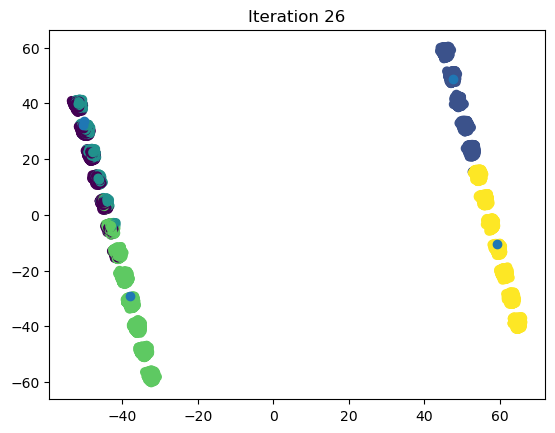

In [21]:
max_iterations = 100
k = 5

centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration< max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels (data,centroids)
    centroids = new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration += 1

In [22]:
centroids


,0,1,2,3,4
track_popularity,55.265295,28.345673,5.944420,27.226668,27.513501
danceability,65.622448,64.948124,62.058129,63.863411,66.853692
energy,64.802751,66.879414,72.140113,67.185234,67.830389
key,8.268064,11.235147,7.254088,70.909218,71.621767
loudness,82.938400,83.260142,83.364239,83.055746,83.302384
mode,100.000000,1.000000,100.000000,100.000000,1.000000
speechiness,9.193693,9.671458,8.993584,9.011762,10.390754
acousticness,9.457202,9.155531,5.362816,8.612060,8.271888
instrumentalness,1.700634,1.923099,3.017861,2.005937,2.124157
liveness,15.538715,15.905521,16.804010,15.859383,16.082993
